<a href="https://colab.research.google.com/github/eyerawnic/53_Pratyush/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

In [5]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

In [6]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
X_test = test_data
y_pred = model.predict(X_test)

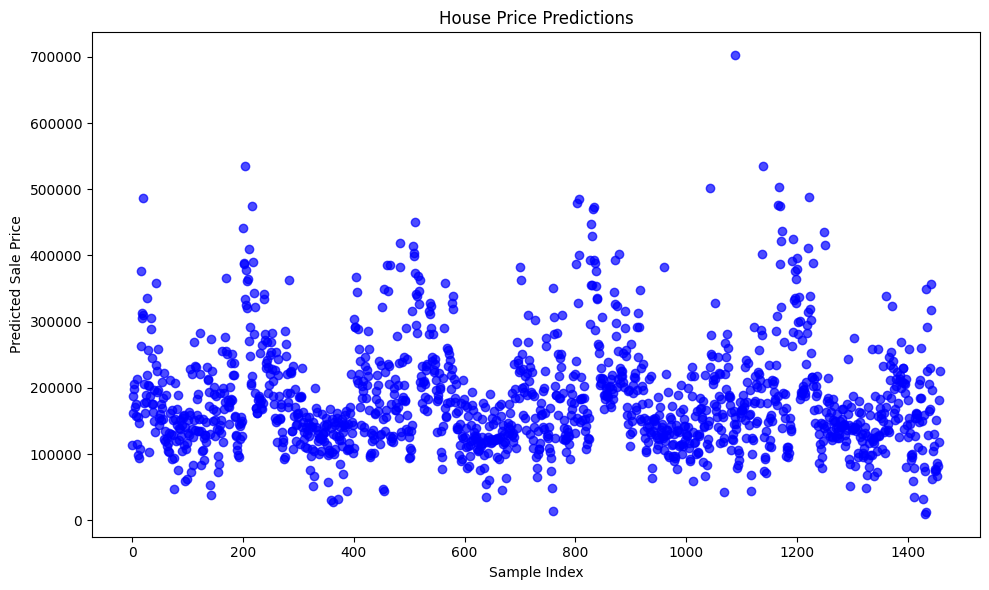

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, color='blue', alpha=0.7)
plt.title('House Price Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Sale Price')
plt.tight_layout()
plt.show()

In [9]:
print(f"Total predictions: {len(y_pred)}")
print(f"Minimum predicted price: ${y_pred.min():,.2f}")
print(f"Maximum predicted price: ${y_pred.max():,.2f}")
print(f"Average predicted price: ${y_pred.mean():,.2f}")

Total predictions: 1459
Minimum predicted price: $9,643.42
Maximum predicted price: $702,542.96
Average predicted price: $181,351.78
